In [1]:
%matplotlib notebook
import sys
sys.path.insert(1, '../../../script/')

In [2]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [3]:
import cleaning as cl
%load_ext autoreload
%autoreload 2

In [4]:
df = pd.read_csv('../../data/training.csv') 

In [5]:
cl.cleaning(df)

In [6]:
df.columns

Index(['IsBadBuy', 'VehicleAge', 'Transmission', 'WheelTypeID', 'VehOdo',
       'Nationality', 'Size', 'MMRAcquisitionAuctionAveragePrice', 'VNST',
       'VehBCost', 'WarrantyCost'],
      dtype='object')

In [7]:
X = df[["VehBCost", "WarrantyCost", "MMRAcquisitionAuctionAveragePrice"]]
print(X.head())

   VehBCost  WarrantyCost  MMRAcquisitionAuctionAveragePrice
0    6100.0           533                             6100.0
1    4000.0          1630                             4000.0
2    7500.0           693                             7500.0
3    4725.0          1633                             4725.0
4    5670.0          1623                             5670.0


<h1>Clustering Preprocessing - Normalization</h1>

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

<p>StandardScalar</p>

In [8]:
scaler = StandardScaler()
scaler.fit(X.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaler.transform(X.values)

array([[-0.39652019, -1.41977609, -0.39652019],
       [-1.62906564,  0.80082911, -1.62906564],
       [ 0.42517677, -1.09589566,  0.42517677],
       ...,
       [ 0.13171357,  0.94859956,  0.13171357],
       [-0.73400288, -1.29629667, -0.73400288],
       [-2.07512971,  0.44658489, -2.07512971]])

In [10]:
X = scaler.transform(X.values)

<h1>DBSCAN</h1>

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

<h2>DBSCAN 8 MMR</h2>

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
from scipy.spatial.distance import pdist, squareform

<h2>DBSCAN con VehBCost, WarrantyCost e MMRAcquisitionAuctionAveragePrice</h2>

In [10]:
X = df[["VehBCost", "WarrantyCost", "MMRAcquisitionAuctionAveragePrice"]]

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X.values)

<h3>Knee Method to estimate the best eps</h3>

In [12]:
from scipy.spatial.distance import pdist, squareform

In [13]:
dist = pdist(X, 'euclidean') #pair wise distance
dist = squareform(dist) #distance matrix given the vector dist

In [14]:
k = 5
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

<IPython.core.display.Javascript object>


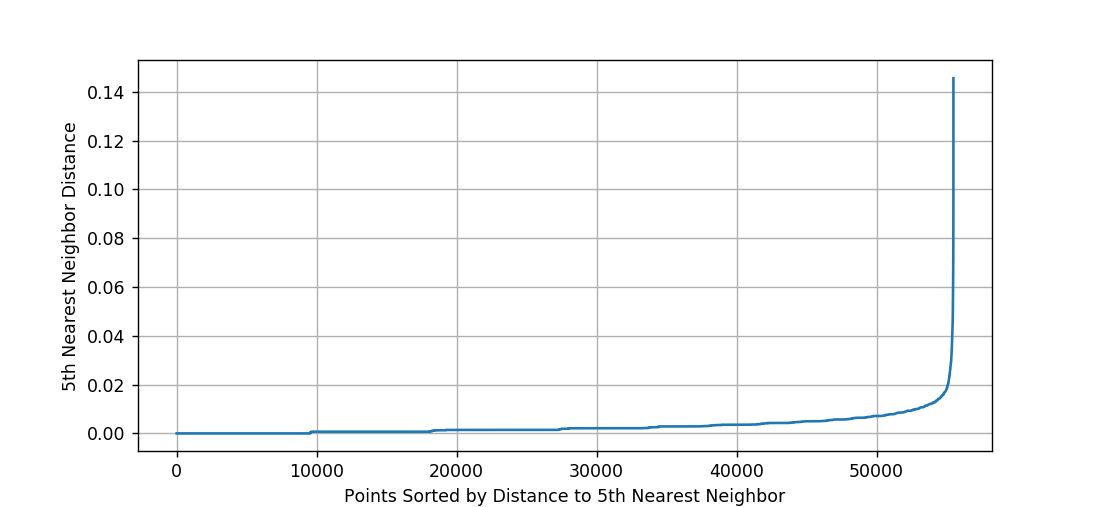

In [15]:
plt.figure(figsize=(12,5))
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('5th Nearest Neighbor Distance')
plt.xlabel('Points Sorted by Distance to 5th Nearest Neighbor')
plt.grid()
plt.tick_params(axis='both', which='major')
plt.show()

<p>Provare da 0.04 a 0.08</p>

In [ ]:
#0.011
max_k = 20
sil = list()
for i in range(5, max_k+1):
    dbscan = DBSCAN(eps=0.008, min_samples=i)
    dbscan.fit(X)
    sil.append(silhouette_score(X, dbscan.labels_))

<IPython.core.display.Javascript object>


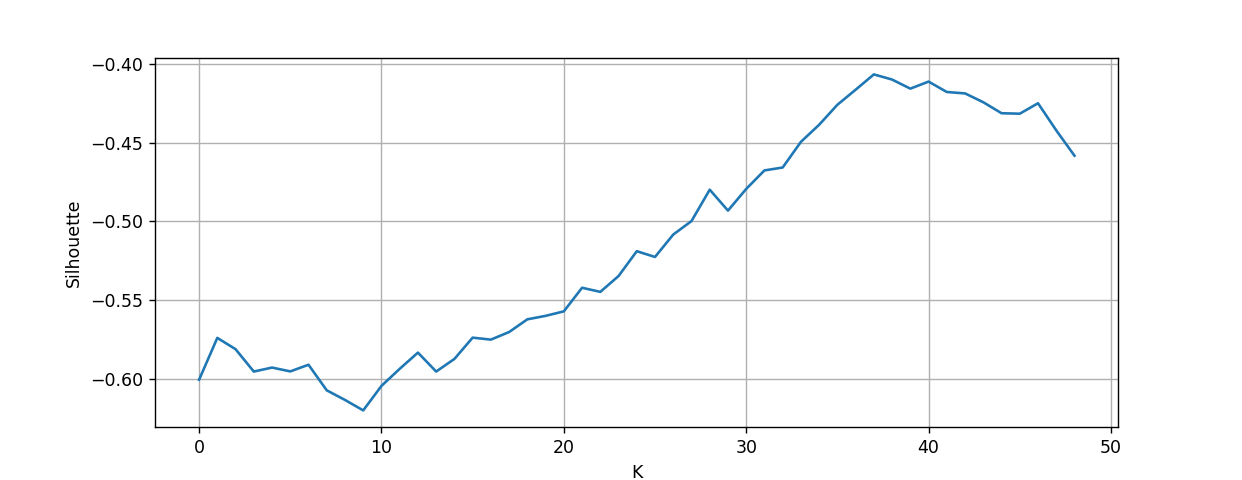

In [22]:
plt.figure(figsize=(12,5))
plt.plot(sil)
plt.ylabel('Silhouette')
plt.xlabel('K')
#plt.xlim(10,20)
plt.grid()
plt.tick_params(axis='both', which='major')
plt.show()

In [19]:
#Choose min_samples = 1.9
dbscan = DBSCAN(eps=0.04, min_samples=1.9)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.04, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=1.9, n_jobs=None, p=None)

In [20]:
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 9


In [23]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([    9, 55478,     3,     2,     2], dtype=int64))

In [16]:
#0.06 no cleaned
max_k = 50
sil = list()
for i in range(2, max_k+1):
    dbscan = DBSCAN(eps=0.04, min_samples=i)
    dbscan.fit(X)
    sil.append(silhouette_score(X, dbscan.labels_))

<IPython.core.display.Javascript object>


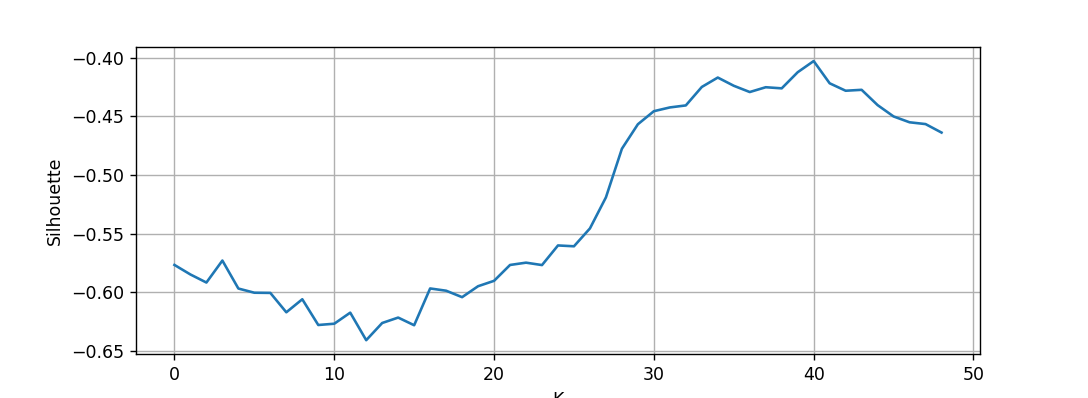

In [15]:
plt.figure(figsize=(12,5))
plt.plot(sil)
plt.ylabel('Silhouette')
plt.xlabel('K')
#plt.xlim(10,20)
plt.grid()
plt.tick_params(axis='both', which='major')
plt.show()

In [22]:
max_k = 50
sil = list()
for i in range(2, max_k+1):
    dbscan = DBSCAN(eps=0.037, min_samples=i)
    dbscan.fit(X)
    sil.append(silhouette_score(X, dbscan.labels_))

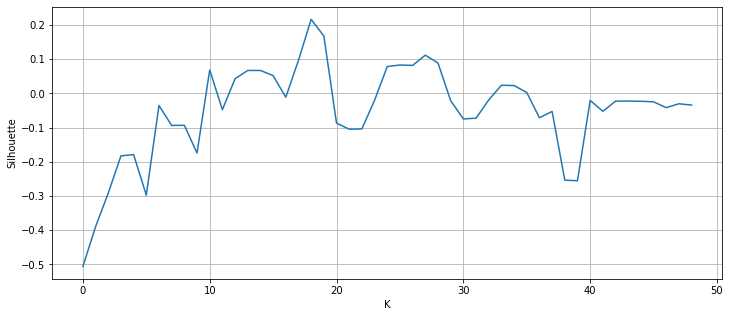

In [27]:
plt.figure(figsize=(12,5))
plt.plot(sil)
plt.ylabel('Silhouette')
plt.xlabel('K')
#plt.xlim(10,20)
plt.grid()
plt.tick_params(axis='both', which='major')
plt.show()

In [28]:
#Choose min_samples = 18
dbscan = DBSCAN(eps=0.037, min_samples=18)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.037, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=18, n_jobs=None, p=None)

In [49]:
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 2936


In [40]:
dbscan.labels_

array([ 0, -1,  0, ...,  0,  0, -1], dtype=int64)

In [29]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([ 2936, 51335,   143,    21,    22,    12], dtype=int64))

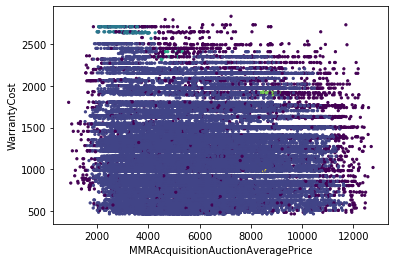

In [37]:
plt.scatter(df["MMRAcquisitionAuctionAveragePrice"], df["WarrantyCost"], c=dbscan.labels_, s=5)
plt.ylabel("WarrantyCost")
plt.xlabel("MMRAcquisitionAuctionAveragePrice")
plt.tick_params(axis='both', which='major')
plt.show()

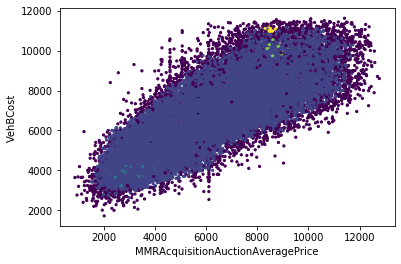

In [38]:
plt.scatter(df["MMRAcquisitionAuctionAveragePrice"], df["VehBCost"], c=dbscan.labels_, s=5)
plt.ylabel("VehBCost")
plt.xlabel("MMRAcquisitionAuctionAveragePrice")
plt.tick_params(axis='both', which='major')
plt.show()

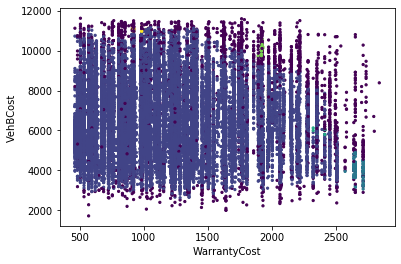

In [39]:
plt.scatter(df["WarrantyCost"], df["VehBCost"], c=dbscan.labels_, s=5)
plt.ylabel("VehBCost")
plt.xlabel("WarrantyCost")
plt.tick_params(axis='both', which='major')
plt.show()